In [101]:
import numpy as np
import matplotlib.pyplot as plt

In [102]:
x = np.arange(-10, 10)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def d_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [110]:
flying_altitude = 25
delivery_altitude = 5
descent_rate = 0.75
distance_to_target = 30

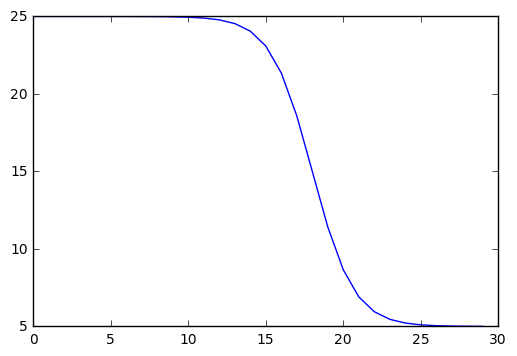

In [123]:
steps = np.arange(distance_to_target)
trajectory = ((flying_altitude - delivery_altitude) * sigmoid(descent_rate * (distance_to_target - steps) - 9)) + delivery_altitude
plt.plot(steps, trajectory)
plt.show()

In [124]:
trajectory

array([ 24.99997258,  24.99994195,  24.99987712,  24.99973986,
        24.99944929,  24.99883417,  24.99753211,  24.99477619,
        24.98894443,  24.97660979,  24.95054754,  24.89559749,
        24.78026115,  24.5404526 ,  24.05148254,  23.0930107 ,
        21.35148952,  18.58357398,  15.        ,  11.41642602,
         8.64851048,   6.9069893 ,   5.94851746,   5.4595474 ,
         5.21973885,   5.10440251,   5.04945246,   5.02339021,
         5.01105557,   5.00522381])

# Here it is, the magic formula.

$$\xi = a_d + A_f \mathrm{sigmoid}(r_d (d_t - x) - b)$$

Where $A_f = a_f - a_d$.

Delivery altitude $a_d$, flying altitude $a_f$, distance to target $d_t$, descent rate parameter $r_d$, buffer parameter $b$, position $x$.

Setting $b$ to 9 seems to make sense.

In [132]:
def get_trajectory(d_t, r_d, a_f, a_d):
    steps = np.arange(d_t)
    return a_d + ((a_f - a_d) * sigmoid(r_d * (d_t - steps) - 9))

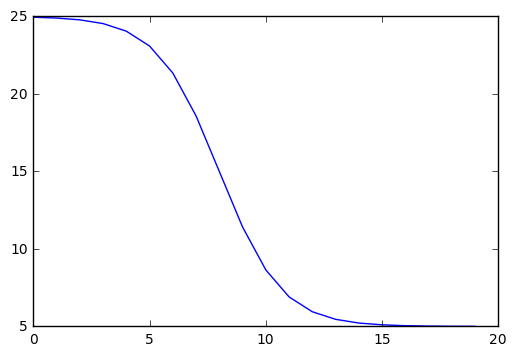

In [142]:
plt.plot(np.arange(20), get_trajectory(20, 0.75, 25, 5))
plt.show()